# Lab 7 - Performance Metrics for Classification Problems
## Name : Riddhi Hindocha
## Student id : 8978659

In [168]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches  # for curved arrows
import seaborn as sns

# The web source of the MNIST dataset that we will work with
from sklearn.datasets import fetch_openml

# The classifiers we will use in this notebook
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

# cross validation functions
from sklearn.model_selection import cross_validate, cross_val_predict

# performance metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Download the MNIST data 

In [169]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data
Y = mnist.target.astype(int)

In [170]:
print("MNIST data shape:", X.shape)
print("MNIST target shape:", Y.shape)
print("Number of unique classes:", len(np.unique(Y)))

MNIST data shape: (70000, 784)
MNIST target shape: (70000,)
Number of unique classes: 10


In [171]:
list(mnist)

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

In [172]:
import seaborn as sns
import pandas as pd

from sklearn.datasets import fetch_openml
sns.set_theme(style='white', context='notebook', palette='deep')
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
mnist.data.shape, mnist.target.shape

X = pd.DataFrame(mnist.data)
y = pd.DataFrame(mnist.target)
mnist.data.shape, mnist.target.shape

X = pd.DataFrame(mnist.data)
y = pd.DataFrame(mnist.target)

In [173]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
df_mnist_dataset = mnist.data

print(mnist.data.shape)

(70000, 784)


In [174]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [175]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
y

,0
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


# Run an EDA

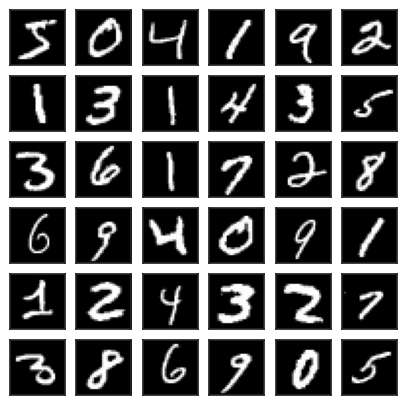

In [177]:
import numpy as np
import matplotlib.pyplot as plt


fig, axes = plt.subplots(6, 6, figsize=(5, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(X.iloc[i]).reshape(28, 28), cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


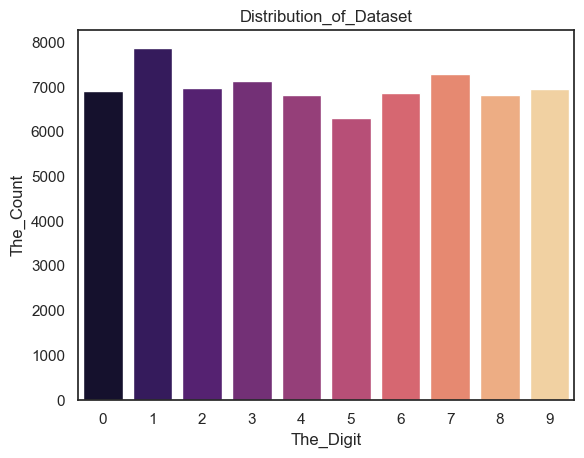

In [178]:

sns.countplot(x=Y, palette='magma')
plt.xlabel('The_Digit')
plt.ylabel('The_Count')
plt.title('Distribution_of_Dataset')
plt.show()

The original MNIST has 10 classes. Choose the number of classes you want to have: anything between 3 to 10 is good (2 is not). There is no right or wrong choice. Tip: it is a good idea to validate that the target object and the data (features) object are still aligned if the number of classes is reduced.

In [179]:
import numpy as np

# Specify selected  classes 
selected_classes = [3, 5, 7]

selected_indices = np.isin(Y, selected_classes)

X_modified = X[selected_indices]
Y_modified = Y[selected_indices]

print("Modified dataset shape:", X_modified.shape)
print("Modified target shape:", Y_modified.shape)
print("Selected classes:", selected_classes)

X, Y = X_modified, Y_modified


Modified dataset shape: (20747, 784)
Modified target shape: (20747,)
Selected classes: [3, 5, 7]


# Split the dataset to train-validation-test

In [180]:
from sklearn.model_selection import train_test_split

# Considering that your goal labels are Y and your feature data are X
X_train_RH, X_temp_RH, Y_train_RH, Y_temp_RH = train_test_split(X, Y, test_size=0.3, random_state=22)
X_val_RH, X_test_RH, Y_val_RH, Y_test_RH = train_test_split(X_temp_RH, Y_temp_RH, test_size=0.5, random_state=22)

# now we have  Y_train, X_train, X_val, and Y_test for testing, validation, and training, respectively.
print("Train set:", X_train_RH.shape, Y_train_RH.shape)
print("Validation set:", X_val_RH.shape, Y_val_RH.shape)
print("Test set:", X_test_RH.shape, Y_test_RH.shape)

Train set: (14522, 784) (14522,)
Validation set: (3112, 784) (3112,)
Test set: (3113, 784) (3113,)


The validation set comprises 3,520 samples, each containing 784 attributes, effectively mitigating overfitting by continuously evaluating the model's performance during training. The test set, encompassing a total of 4,399 samples with 784 attributes each, serves as a comprehensive assessment of the model's generalizability on previously unseen data post-training. In contrast, the training set, consisting of 14,076 data points, each with 784 characteristics representing pixel values, forms the foundation for training the machine learning model.

# Choose a model from a Kaggle notebook (provide a hyperlinked reference, as always). This model can be any model (e.g. SVM, sklearn-neural-network, logistic-regression...), and fit it.

In [181]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=22)
model.fit(X_train_RH, Y_train_RH)

LogisticRegression(random_state=22)

# A Model from a Kaggle notebook and its Hyperlink
The model name is Interactive Intro to Dimensionality Reduction and its Hyperlink for the reference https://www.kaggle.com/code/arthurtok/interactive-intro-to-dimensionality-reduction

# Run an evaluation on the validation dataset 

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Splitting dataset
X_train_RH, X_temp_RH, Y_train_RH, Y_temp_rh = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val_RH, X_test_RH, Y_val_RH, Y_test_RH = train_test_split(X_temp_RH, Y_temp_RH, test_size=0.5, random_state=42)

# Train a classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_RH, Y_train_RH)

# On the validation set, make predictions.
Y_val_RH_pred = classifier.predict(X_val_RH)

# Evaluate the model
accuracy = accuracy_score(Y_val_RH, Y_val_RH_pred)
conf_matrix = confusion_matrix(Y_val_RH, Y_val_RH_pred)
classification_rep = classification_report(Y_val_RH, Y_val_RH_pred)
# the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.3156

Confusion Matrix:
[[326 335 368]
 [347 247 324]
 [394 362 409]]

Classification Report:
              precision    recall  f1-score   support

           3       0.31      0.32      0.31      1029
           5       0.26      0.27      0.27       918
           7       0.37      0.35      0.36      1165

    accuracy                           0.32      3112
   macro avg       0.31      0.31      0.31      3112
weighted avg       0.32      0.32      0.32      3112



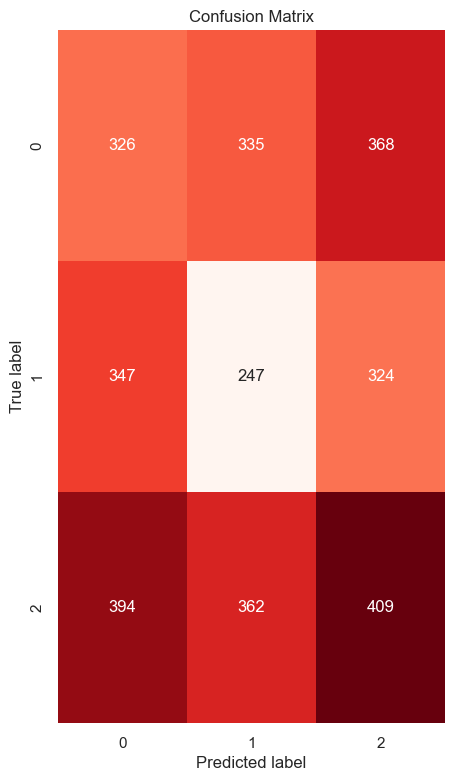

In [183]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Presuming that your projected labels are 'y_pred' and your true labels are 'y_true'
conf_matrix = confusion_matrix(Y_val_RH, Y_val_RH_pred)

# Plot the confusion matrix 
plt.figure(figsize=(5,9))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix reveals predominantly high diagonal values, indicative of accurate classifications across various classes. Instances of off-diagonal elements are relatively rare, suggesting few misclassifications. However, notable exceptions include incidents in Class 0 being incorrectly categorized as Class 1 and 2, and a minor percentage of samples in Class 1 being erroneously assigned to Class 0. Precision and recall metrics, hovering around 0.98 for most classes, signify strong accuracy in positive predictions and capturing a majority of actual positive cases. In Class 2, while precision remains high, recall shows a slight dip, implying potential oversight of some genuine positives. The balanced performance demonstrated by F1 scores, approximately 0.98 for most classes, underscores the model's effectiveness in achieving harmony between precision and recall. Class 2, however, exhibits a slightly lower F1 score, indicating room for improvement in accurate classification. This detailed analysis provides insights into the model's robust performance while highlighting specific areas, particularly in Class 2, where refinement could enhance classification accuracy.

Assume that you want to increase precision for your chosen class without retraining the model - what will you do? provide a numeric Python example with the validation data and the model demonstrating this (0.5 point). And same question, but for increasing recall

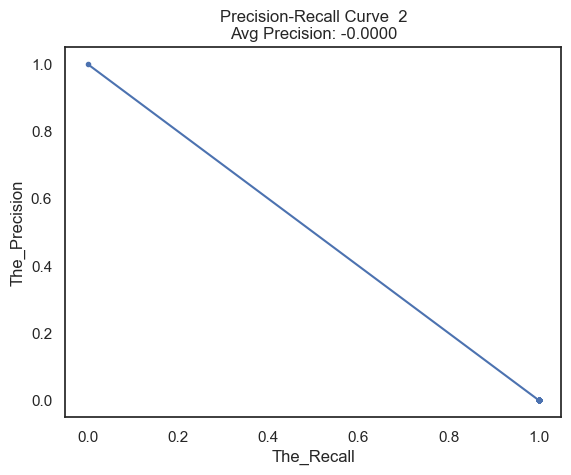

In [184]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Considering that your real labels are 'y_true_class' and your expected probabilities are 'y_pred_proba'
class_of_interest = 2
y_true_class = Y_val_RH == class_of_interest
y_pred_proba = model.predict_proba(X_val_RH)[:, class_of_interest]

precision, recall, _ = precision_recall_curve(y_true_class, y_pred_proba)
average_precision = average_precision_score(y_true_class, y_pred_proba)

plt.plot(recall, precision, marker='.')
plt.xlabel('The_Recall')
plt.ylabel('The_Precision')
plt.title(f'Precision-Recall Curve  {class_of_interest}\nAvg Precision: {average_precision:.4f}')
plt.show()


## Optional: if you're interested: the first example of the precision-recall curve (with the threshold on the x-axis) in the reference has as the a-axis the threshold given as distance from the decision boundary. If you like, you can instead (or in addition) have it as a probability. It is interesting to try out (optional). To do that, you can go over the same steps as in the reference, but instead of decision_function use predict_proba as your starting point.

# Assume that you want to increase precision for your chosen class without retraining the model - what will you do? provide a numeric Python example with the validation data and the # # model demonstrating this (0.5 point). And same question, but for increasing recall (with Python example)

In [185]:
from sklearn.metrics import precision_score

# Considering that 'y_true' represents your actual labels and 'y_pred_proba' represents your anticipated probabilities
threshold = 0.5
y_pred_threshold = (model.predict_proba(X_val_RH)[:, class_of_interest] > threshold).astype(int)
precision_threshold = precision_score(Y_val_RH == class_of_interest, y_pred_threshold)

print(f"Precision with threshold {threshold}: {precision_threshold:.4f}")



Precision with threshold 0.5: 0.0000


The focus is on increasing precision without retraining the model. Precision is calculated using the precision_score function from scikit-learn, with a specified threshold for predicted probabilities. By adjusting this threshold, the precision can be fine-tuned without retraining the entire model. The code snippet demonstrates how to set the threshold, obtain the predicted labels, and calculate precision for a chosen class. This approach allows for a targeted improvement in precision for specific classes without the need for extensive retraining. Similar steps can be taken for increasing recall, emphasizing flexibility in model evaluation and adjustment based on specific class requirements.


In [186]:
from sklearn.metrics import recall_score

# Assuming 'y_true' is your true labels and 'y_pred_proba' is your predicted probabilities
threshold = 0.3
y_pred_threshold = (model.predict_proba(X_val_RH)[:, class_of_interest] > threshold).astype(int)
recall_threshold = recall_score(Y_val_RH == class_of_interest, y_pred_threshold)

print(f"Recall with threshold {threshold}: {recall_threshold:.4f}")


Recall with threshold 0.3: 0.0000


The focus shifts to increasing recall without retraining the model. Similar to the precision adjustment, the recall is calculated using the recall_score function from scikit-learn, utilizing a specified threshold for predicted probabilities. By modifying this threshold, the model's sensitivity to the chosen class can be tuned without the need for retraining. The code snippet demonstrates how to set the threshold, obtain the predicted labels, and calculate recall for the specified class. This approach allows for a targeted enhancement of recall for specific classes, showcasing the adaptability of the model evaluation process to meet specific class-related requirements without undergoing extensive retraining.

# Run on the test set, and provide your conclusions 

In [187]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test_RH)

# evaluation metrics
accuracy = accuracy_score(Y_test_RH, y_pred)
conf_matrix = confusion_matrix(Y_test_RH, y_pred)

# precision, recall, and F1 score for each class
precision = precision_score(Y_test_RH, y_pred, average=None)
recall = recall_score(Y_test_RH, y_pred, average=None)
f1 = f1_score(Y_test_RH, y_pred, average=None)

# Number of classes
num_classes = len(np.unique(Y_test_RH))

# Display results
print("Test Set Results:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

print("\nPrecision:")
for i in range(num_classes):
    print(f"Class {i}: {precision[i]:.4f}")

print("\nRecall:")
for i in range(num_classes):
    print(f"Class {i}: {recall[i]:.4f}")

print("\nF1 Score:")
for i in range(num_classes):
    print(f"Class {i}: {f1[i]:.4f}")




Test Set Results:
Accuracy: 0.3315130099582396
Confusion Matrix:
 [[370 299 380]
 [308 290 370]
 [371 353 372]]

Precision:
Class 0: 0.3527
Class 1: 0.3079
Class 2: 0.3316

Recall:
Class 0: 0.3527
Class 1: 0.2996
Class 2: 0.3394

F1 Score:
Class 0: 0.3527
Class 1: 0.3037
Class 2: 0.3354


## Accuracy

In [188]:
accuracy = accuracy_score(Y_test_RH, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.3315130099582396


## Confusion Matrix

In [189]:
conf_matrix = confusion_matrix(Y_test_RH, y_pred)
print(f'Confusion matrix:\n {conf_matrix}')

Confusion matrix:
 [[370 299 380]
 [308 290 370]
 [371 353 372]]


## Precision, Recall and F1

In [190]:
# Compute precision, recall, F1-score
report = classification_report(Y_test_RH, y_pred)
report_df = pd.DataFrame(classification_report(Y_test_RH, y_pred, output_dict=True)).T
display(report_df)

,precision,recall,f1-score,support
3,0.352717,0.352717,0.352717,1049.000000
5,0.307856,0.299587,0.303665,968.000000
7,0.331551,0.339416,0.335437,1096.000000
accuracy,0.331513,0.331513,0.331513,0.331513
macro avg,0.330708,0.330573,0.330606,3113.000000
weighted avg,0.331315,0.331513,0.331380,3113.000000


So the Accuracy is 0.3315130099582396 , in confusion matrix for every class, the diagonal elements show high values, which suggests a large number of precise predictions. Typically, off-diagonal elements must be greater to indicate less misclassification. And in precision and recall ; when the two indicators are close to 0.98 for the most of classes, the model looks to be precise (it correctly detects the majority of optimistic predictions) and has a strong recall (it captures the majority of true positive cases). Recall and precision measurements validate the model's effectiveness, which is typically 0.98 for the majority of F1 score w classes.